In [118]:
import pandas as pd
df = pd.read_csv('SMSSpamCollection.csv', sep='¤', engine='python')
pd.set_option('display.max_colwidth', None)
df[2202:2222].style.set_properties(**{'text-align': 'left'})

,CATEGORY,SMS
2202,ham,A boy was late 2 home. His father: POWER OF FRNDSHIP
2203,ham,"(And my man carlos is definitely coming by mu tonight, no excuses)"
2204,ham,soon you will have the real thing princess! Do i make you wet? :)
2205,ham,Raji..pls do me a favour. Pls convey my Birthday wishes to Nimya. Pls. Today is her birthday.
2206,ham,"Haha, my legs and neck are killing me and my amigos are hoping to end the night with a burn, think I could swing by in like an hour?"
2207,spam,"URGENT! Your mobile No 07xxxxxxxxx won a £2,000 bonus caller prize on 02/06/03! this is the 2nd attempt to reach YOU! call 09066362231 ASAP! BOX97N7QP, 150PPM"
2208,ham,Usually the body takes care of it buy making sure it doesnt progress. Can we pls continue this talk on saturday.
2209,spam,"URGENT!! Your 4* Costa Del Sol Holiday or £5000 await collection. Call 09050090044 Now toClaim. SAE, TC s, POBox334, Stockport, SK38xh, Cost£1.50/pm, Max10mins"
2210,ham,"Hmm well, night night"
2211,ham,Just wanted to say holy shit you guys weren't kidding about this bud


In [115]:
df[222:250]

,CATEGORY,SMS
222,ham,There is os called ubandu which will run without installing in hard disk...you can use that os to copy the important files in system and give it to repair shop..
223,ham,"Sorry, I'll call later"
224,ham,U say leh... Of course nothing happen lar. Not say v romantic jus a bit only lor. I thk e nite scenery not so nice leh.
225,spam,"500 New Mobiles from 2004, MUST GO! Txt: NOKIA to No: 89545 & collect yours today!From ONLY £1 www.4-tc.biz 2optout 087187262701.50gbp/mtmsg18"
226,ham,Would really appreciate if you call me. Just need someone to talk to.
227,spam,"Will u meet ur dream partner soon? Is ur career off 2 a flyng start? 2 find out free, txt HORO followed by ur star sign, e. g. HORO ARIES"
228,ham,Hey company elama po mudyadhu.
229,ham,"Life is more strict than teacher... Bcoz Teacher teaches lesson &amp; then conducts exam, But Life first conducts Exam &amp; then teaches Lessons. Happy morning. . ."
230,ham,Dear good morning now only i am up
231,ham,Get down in gandhipuram and walk to cross cut road. Right side &lt;#&gt; street road and turn at first right.


In [70]:
print('NR OF SAMPLES:', len(df))

NR OF SAMPLES: 5574


,CATEGORY,SMS
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."


In [94]:
import re
from collections import Counter

# Get all sms where the label is spam
spam = df[df['CATEGORY'] == 'spam']
text = spam['SMS'].to_string(index=False)
text = text.replace('\n', ' ')
text = re.sub(r'((?!\w| ).)*', '', text)
text = re.sub(r'\s+', ' ', text)

# Count unique words
words = text.split(' ')

In [111]:
common_english_words = [
  'the', 'be', 'to', 'of', 'and', 'a', 'in', 'that', 'have', 
  'I', 'it', 'for', 'not', 'on', 'with', 'he', 'as', 'you', 
  'do', 'at', 'this', 'but', 'his', 'by', 'from', 'they', 
  'we', 'say', 'her', 'she', 'or', 'will', 'an', 'my', 
  'one', 'all', 'would', 'there', 'their', 'what', 'so', 
  'up', 'out', 'if', 'about', 'who', 'get', 'which', 'go', 
  'when', 'me', 'make', 'can', 'like', 'time', 'no', 'just', 
  'him', 'know', 'take', 'person', 'into', 'year', 'your', 
  'good', 'some', 'could', 'them', 'see', 'other', 'than', 
  'then', 'now', 'look', 'only', 'come', 'its', 'over', 
  'think', 'also', 'back', 'after', 'use', 'two', 'how', 
  'our', 'work', 'first', 'well', 'way', 'even', 'new', 
  'want', 'because', 'any', 'these', 'give', 'day', 'most', 
  'us', 'over', 'new', 'sound', 'take', 'only', 'little', 
  'work', 'know', 'place', 'year', 'live', 'me', 'back', 
  'give', 'most', 'very', 'after', 'thing', 'our', 'just', 
  'name', 'good', 'sentence', 'man', 'think', 'say', 'great',
  'where', 'help', 'through', 'much', 'before', 'line',
  'right', 'too', 'mean', 'old', 'any', 'same', 'tell',
  'boy', 'follow', 'came', 'want', 'show', 'also', 'around',
  'form', 'three', 'small', 'set', 'put', 'end', 'does',
  'another', 'well', 'large', 'must', 'big', 'even', 'such',
  'because', 'turn', 'here', 'why', 'ask', 'went', 'men',
  'read', 'need', 'land', 'different', 'home', 'us', 'move',
  'try', 'kind', 'hand', 'picture', 'again', 'change',
  'off', 'play', 'spell', 'air', 'away', 'animal', 'house',
  'point', 'page', 'letter', 'mother', 'answer', 'found',
  'study', 'still', 'learn', 'should', 'America', 'world'
]

common_english_words = [w.lower() for w in common_english_words]
words = [w.lower() for w in words]

most_spammy_words = [w for w in words if w not in common_english_words]

top20 = Counter(most_spammy_words).most_common(20)
for word, count in top20:
  print(count, "->", word)

95 -> u
89 -> is
83 -> free
81 -> ur
73 -> call
72 -> 2
63 -> are
57 -> urgent
55 -> 4
53 -> mobile
40 -> win
35 -> awarded
35 -> nokia
33 -> been
33 -> contact
32 -> won
32 -> service
30 -> 500
28 -> customer
27 -> 1


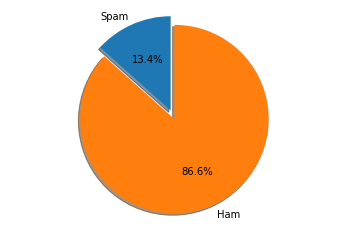

In [95]:
# Pie chart
import matplotlib.pyplot as plt
labels = 'Spam', 'Ham'
sizes = [len(spamDf), len(df.loc[df['CATEGORY'] == 'ham'])]
explode = (0, 0.1)  # only "explode" the 2nd slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [73]:
#check for empty values ....   
#df.isnull().sum()
#df.info()
# - invalid values?
#df.dropna(inplace=True)  # will remove rows with NA

In [74]:

X = df['SMS']
y = df['CATEGORY']

In [75]:
#making sure that the y column has only two possible values
print(y.unique())

array(['ham', 'spam', 'spam '], dtype=object)

In [76]:
y = y.str.strip()
y.unique()

array(['ham', 'spam'], dtype=object)

In [77]:
#Transforming them to numerical values
y[y == 'spam'] = 1
y[y == 'ham'] = 0
y[:5]

0    0
1    0
2    1
3    0
4    0
Name: CATEGORY, dtype: object

In [78]:
import numpy as np
y = np.asarray(y).astype(int)

In [79]:
print('***** Nr of characters the longest content is: ',
max([len(x) for x in X]))

***** Nr of characters the longest content is:  910


In [126]:
#TODO DO A HISTORY WITH MESAGES LENGTH, MAYBE BY CATEGORY TOO! ! !
# x_in_word_count = X.applymap(lambda sms : len(sms.split(' ')))
# x_in_word_count

In [81]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
total_words = len(tokenizer.word_index) + 1
total_words

9009

In [82]:
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [83]:
X = tokenizer.texts_to_sequences(X)
X[:3]

[[49,
  471,
  4434,
  842,
  755,
  658,
  64,
  8,
  1327,
  88,
  123,
  351,
  1328,
  148,
  2996,
  1329,
  67,
  58,
  4435,
  144],
 [46, 336, 1499, 472, 6, 1940],
 [47,
  489,
  8,
  19,
  4,
  797,
  901,
  2,
  176,
  1941,
  1105,
  659,
  1942,
  2331,
  261,
  2332,
  71,
  1941,
  2,
  1943,
  2,
  337,
  489,
  555,
  960,
  73,
  391,
  174,
  660,
  392,
  2997]]

In [84]:
# pad content based on the longest SMS...
max_SMS_len = max(len(x) for x in X)
print('*****Max words in SMS:', max_SMS_len)

from tensorflow.keras.preprocessing.sequence import pad_sequences
X = pad_sequences(X, maxlen=100)
X[2]

*****Max words in SMS: 189


array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,   47,  489,    8,   19,    4,  797,  901,    2,
        176, 1941, 1105,  659, 1942, 2331,  261, 2332,   71, 1941,    2,
       1943,    2,  337,  489,  555,  960,   73,  391,  174,  660,  392,
       2997])

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 22)
print('***** Shape of training samples: ', X_train.shape)
print('***** Shape of testing samples: ', X_test.shape)

***** Shape of training samples:  (4459, 100)
***** Shape of testing samples:  (1115, 100)


In [86]:
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Embedding(9009, 128)) # 48998 distinct words, 128 neurons (columns in Excel)
model.add(LSTM(128, dropout=0.3, recurrent_dropout=0.3))
model.add(Dense(units=1, activation='sigmoid'))

In [87]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [88]:
model.fit(X_train, y_train,
          batch_size=16,
          epochs=3,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/3
279/279 [==============================] - 70s 238ms/step - loss: 0.1150 - accuracy: 0.9621 - val_loss: 0.0521 - val_accuracy: 0.9892
Epoch 2/3
279/279 [==============================] - 65s 235ms/step - loss: 0.0171 - accuracy: 0.9948 - val_loss: 0.0533 - val_accuracy: 0.9874
Epoch 3/3
279/279 [==============================] - 68s 243ms/step - loss: 0.0070 - accuracy: 0.9980 - val_loss: 0.0475 - val_accuracy: 0.9892


In [89]:
score, acc = model.evaluate(X_test, y_test,
                            batch_size=32,
                            verbose=2)
print('Test score:', score)
print('Test accuracy:', acc)

35/35 - 1s - loss: 0.0475 - accuracy: 0.9892 - 1s/epoch - 36ms/step
Test score: 0.0475059412419796
Test accuracy: 0.9892376661300659


In [90]:
new_SMS = "I am tired of doing the same things every day"
new_SMS = tokenizer.texts_to_sequences([new_SMS])
new_SMS = pad_sequences(new_SMS, maxlen=100)

In [91]:
result = model.predict(new_SMS)
result

array([[0.00077218]], dtype=float32)

In [92]:
new_SPAM = "500 fresh burguers MUST GO! Txt: KING to No: 220022"
new_SPAM = tokenizer.texts_to_sequences([new_SPAM])
#print(new_SPAM)
new_SPAM = pad_sequences(new_SPAM, maxlen=100)
result = model.predict(new_SPAM)
print(result)

[[0.46541274]]


In [93]:
model.save("model.h5")